In [105]:
# Importing Relevant Libraries

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



from sklearn import svm

import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb


pd.set_option('display.max_columns', 100)

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

In [106]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [107]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [108]:
# checking for missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# checking for duplicates
dataframe = pd.DataFrame(df)
duplicates = dataframe.duplicated()
duplicates

65823     False
29719     False
59863     False
8717      False
91354     False
          ...  
14674     False
81898     False
215777    False
75049     False
141022    False
Length: 284807, dtype: bool

In [109]:
# feature scaling (Amount and Time)
from sklearn.preprocessing import RobustScaler

df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [110]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# To check that Amount and Time are Scaled

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [111]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# To check that Amount and Time are Scaled

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [112]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
230205,-0.293440,0.723023,-0.650568,0.838176,1.173210,-0.940741,-0.274924,-0.584496,0.221744,0.145044,0.591629,-0.813465,-1.114134,0.191766,0.116041,-0.173607,0.299458,0.291654,-0.594501,-0.110308,-0.082171,-0.202202,-0.146483,-0.423430,-0.012539,-0.140810,-0.232583,-0.316755,-0.537992,-0.263958,0
145800,5.998323,0.029488,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,-0.133950,1.033032,-0.284368,-1.208280,-0.429212,0.248945,-0.928922,1.679986,1.315339,2.226161,1.275358,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,1
227262,-0.279466,0.708537,2.157356,0.214562,-2.354999,0.282560,0.652731,-1.890671,1.027112,-0.713174,-0.156690,0.226991,-0.710857,0.266710,0.062721,0.773991,-0.276827,-0.807871,-0.077987,-0.795450,0.089827,-0.229350,0.258477,0.958031,-0.169795,0.173144,0.626998,1.014915,-0.144183,-0.097053,0
140786,-0.293440,-0.008905,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,-2.743539,-5.638941,4.343743,-6.655734,-0.293109,-9.505141,-1.396149,-4.850323,-10.006253,-2.789598,0.982584,0.745029,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1
68067,6.957312,-0.374511,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,-0.136742,-0.150129,1.172355,-0.795988,-2.136951,0.578869,1.412115,0.013467,-0.119204,0.826814,0.476860,1.230278,0.610654,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,1


In [113]:
temp = df["Class"].value_counts()
data = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = data['Class'],y = data['values'],
    name="Credit Card Fraud Class Distributions \n (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Green"),
    text=data['values']
)
data_unbalance = [trace]
layout = dict(title = 'Credit Card Fraud Class Distributions \n (Not fraud = 0, Fraud = 1',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data_unbalance, layout=layout)
iplot(fig, filename='class')

In [114]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
4813,0.090827,-0.944583,1.263774,0.094328,0.220643,-0.657389,-0.421455,-1.319031,0.137604,-0.484556,2.150525,-1.358331,1.055151,-1.048386,3.281144,1.508817,0.716476,-0.698939,0.429380,0.150534,0.258374,-0.006475,-0.029981,0.333786,-0.186201,0.410212,0.816749,-0.616937,0.024326,0.021303,0
247673,3.156012,0.810172,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,-2.120458,1.863596,-3.620252,-1.480714,-1.583343,-1.230469,-1.202298,-6.167637,-2.651539,0.013588,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,1
44202,-0.167680,-0.503401,1.382744,-0.664561,0.621047,-0.442754,-1.303006,-0.782494,-0.725121,-0.059699,-0.193436,0.510871,-0.785897,-0.959072,-1.155811,-0.273650,-0.284100,0.729867,0.714565,-1.632247,0.949637,-0.029123,-0.101831,-0.275225,0.045811,0.376796,0.399615,-0.329129,0.012930,0.015007,0
42473,-0.254454,-0.511942,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,-11.298156,7.252953,-14.275092,0.188903,-14.555957,-0.338289,-12.146540,-25.162799,-9.042845,0.787579,1.384743,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,1
45203,-0.293440,-0.498655,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,-4.077585,4.389214,-5.849558,-0.750964,-11.583898,0.838750,-1.461029,0.635694,0.390150,-1.063028,-0.162797,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


/Users/damilolashobowale/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



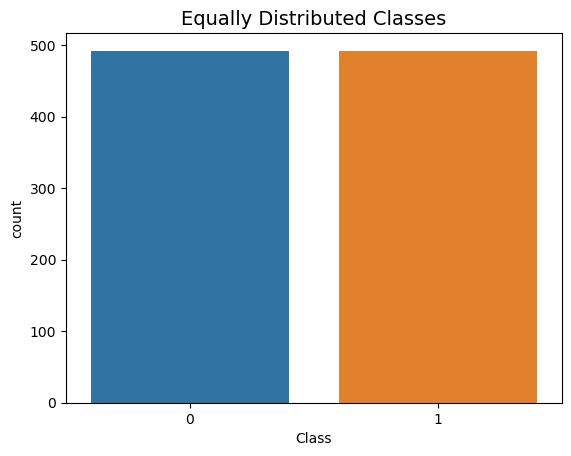

In [115]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
sns.color_palette("magma", as_cmap=True)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

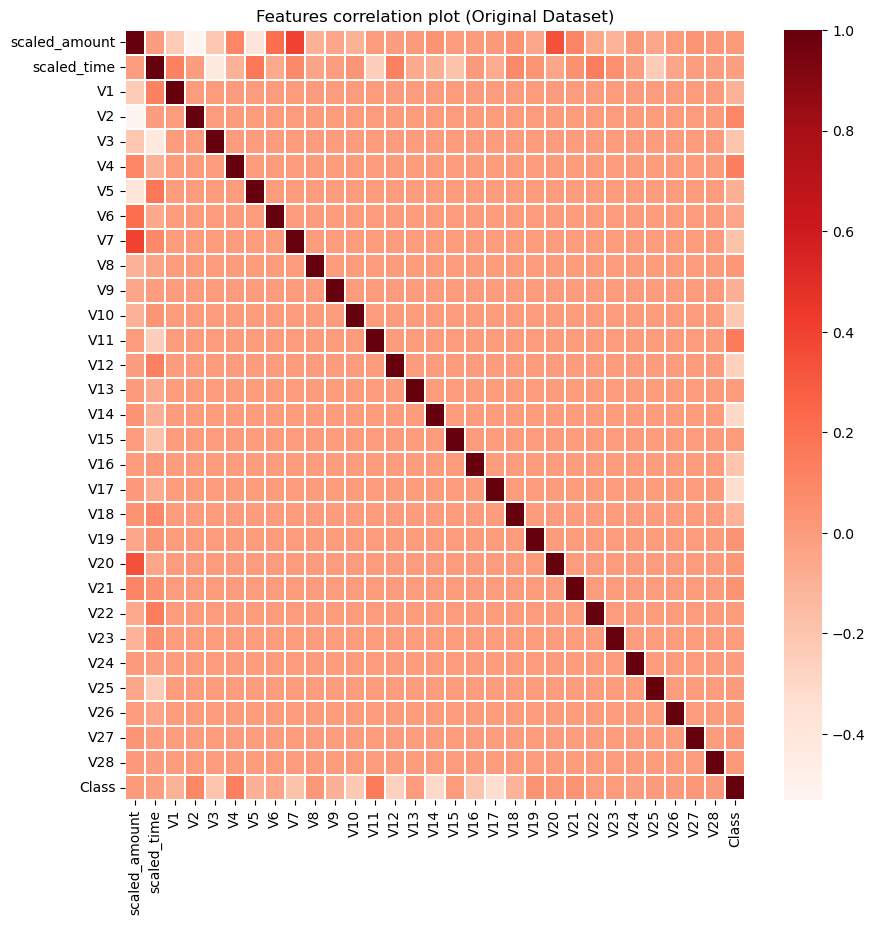

In [116]:
#Features Correlation 

# Original Dataset

plt.figure(figsize = (10,10))
plt.title('Features correlation plot (Original Dataset)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()


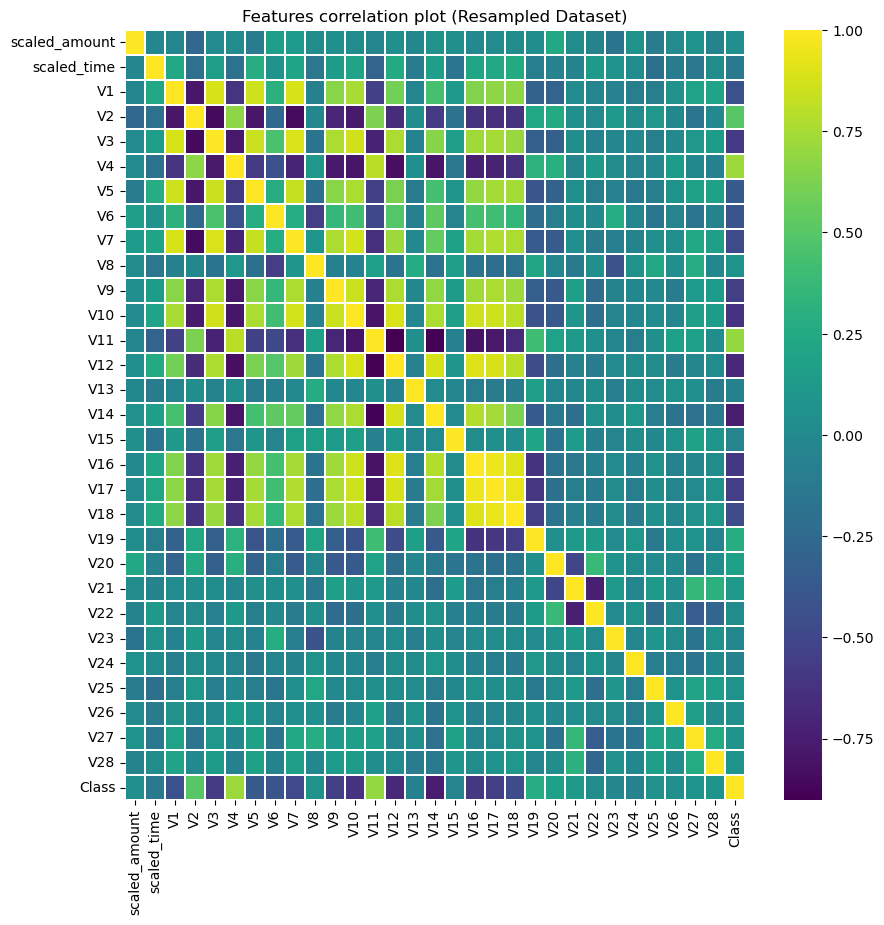

In [117]:
# Resampled Dataset

plt.figure(figsize = (10,10))
plt.title('Features correlation plot (Resampled Dataset)')
resampled_corr = new_df.corr()
sns.heatmap(resampled_corr,xticklabels=resampled_corr.columns,yticklabels=resampled_corr.columns,linewidths=.1,cmap="viridis")
plt.show()

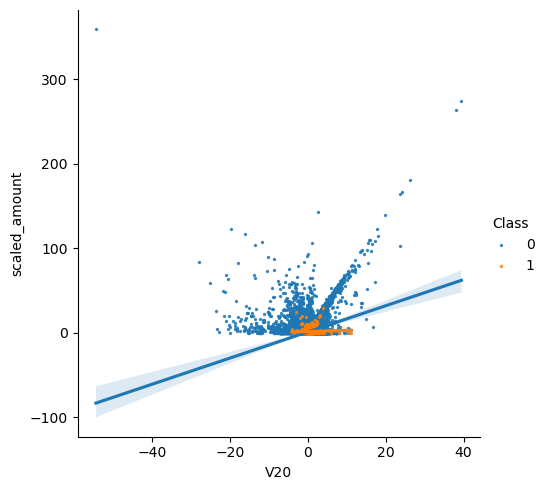

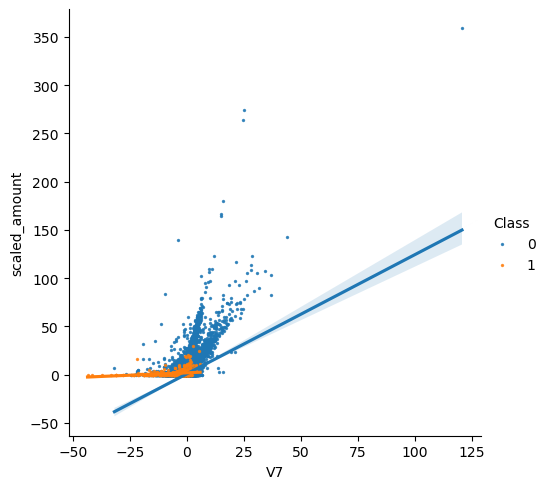

In [118]:
#Direct correlation between Amount and the features, V7 and V20 (from the original data)

s = sns.lmplot(x='V20', y='scaled_amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='scaled_amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})

plt.show()

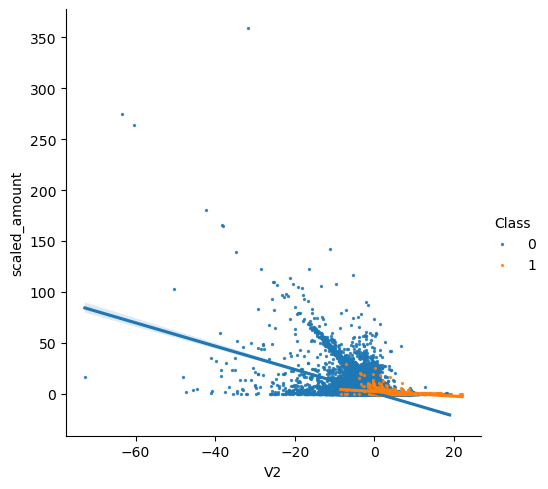

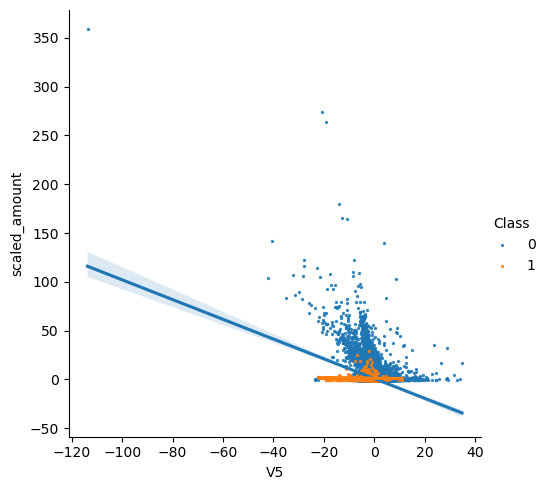

In [119]:
#Inverse correlation between Amount and the features, V2 and V5 (from the original data)

s = sns.lmplot(x='V2', y='scaled_amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='scaled_amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

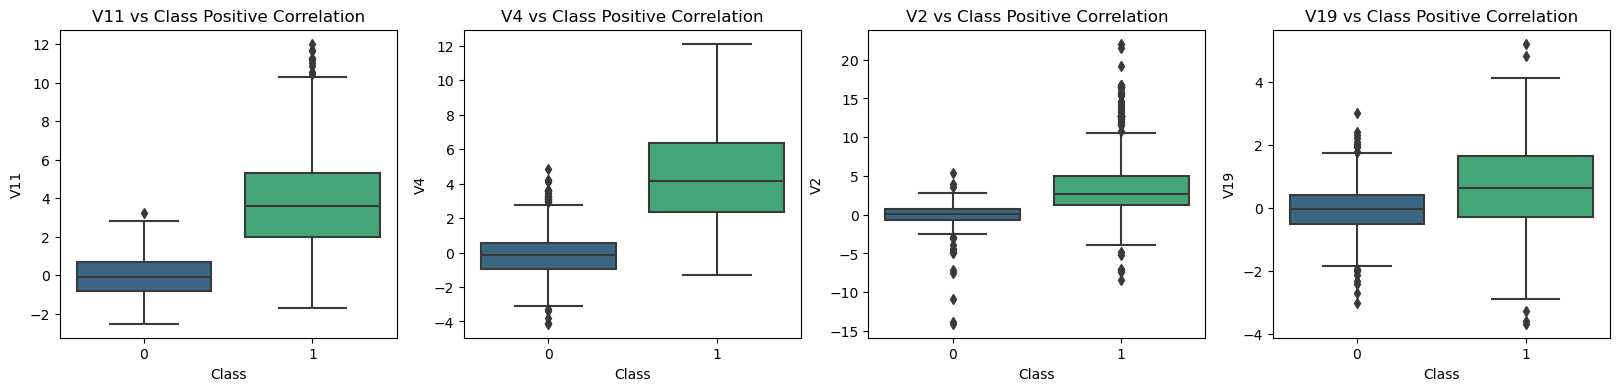

In [120]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations from the resampled data (The higher the feature value, the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette="viridis", ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette="viridis", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette="viridis", ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette="viridis", ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

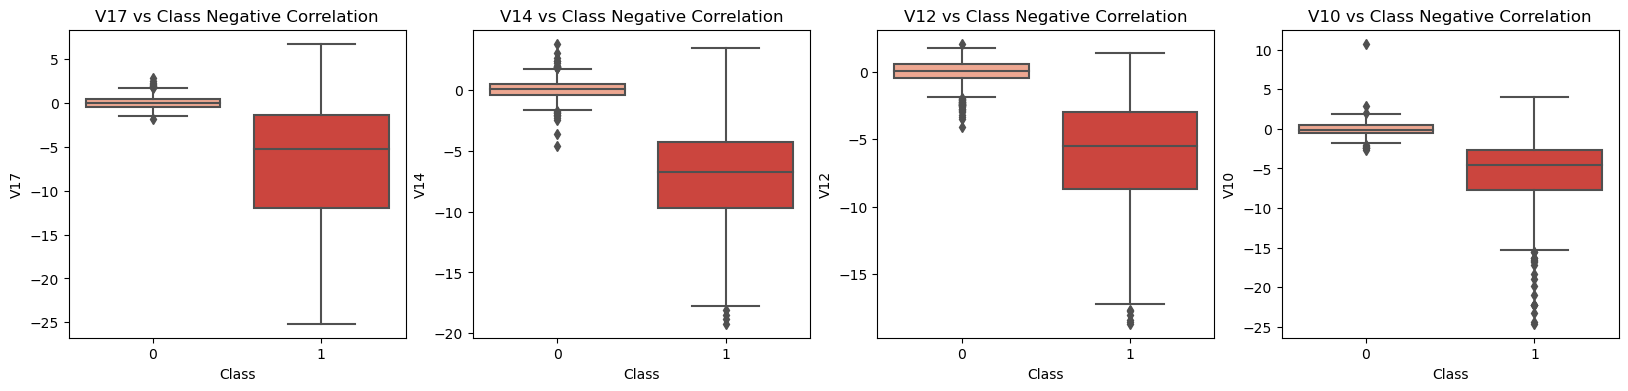

In [121]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class from the resampled data (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette="Reds", ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette="Reds", ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette="Reds", ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette="Reds", ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [189]:
# Defining predictors and target values
target = 'Class'
predictors = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'scaled_amount']

In [123]:
# Splitting data into train, test and validation set (for original data)
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

In [124]:
# Random Forest Classifier (Original Data) - Initialization
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [125]:
# Training the model with train_df and fit function
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [126]:
# Predicting the target values for the valid_df data, using the predict function
RF_preds = clf.predict(valid_df[predictors])

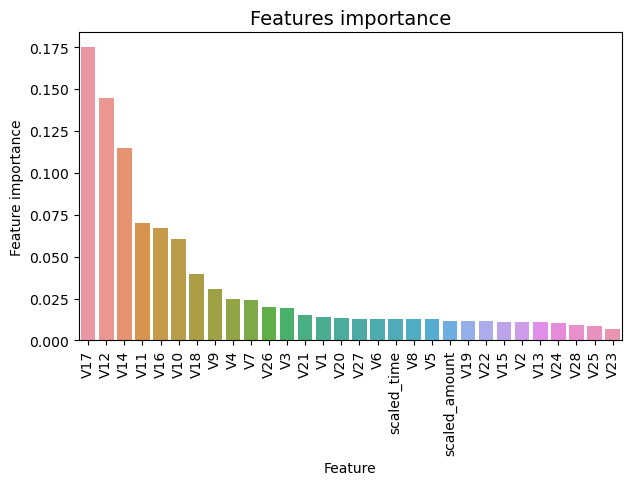

In [127]:
# Features Importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

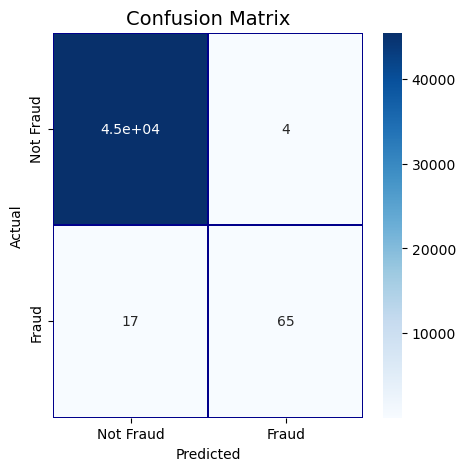

In [128]:
# Confusion Matrix
cm = pd.crosstab(valid_df[target].values, RF_preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [129]:
# Area Under Curve
roc_auc_score(valid_df[target].values, RF_preds)

0.8962974948082191

In [130]:
# Recall Score
recall_score(valid_df[target].values, RF_preds)

0.7926829268292683

In [131]:
# Accuracy Score
accuracy_score(valid_df[target].values, RF_preds)

0.9995391603941276

In [132]:
# Precision Score
precision_score(valid_df[target].values, RF_preds)

0.9420289855072463

In [133]:
# F1 Score
f1_score(valid_df[target].values, RF_preds)

0.8609271523178808

In [134]:
# XGBoost Algorithm (Original Data) - Initialization

dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [135]:
# Training the model 
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.92424	valid-auc:0.93841


/Users/damilolashobowale/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:727: FutureWarning:

Pass `evals` as keyword args.

/Users/damilolashobowale/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning:

[22:58:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.




[50]	train-auc:0.92977	valid-auc:0.94389
[100]	train-auc:0.97221	valid-auc:0.96762
[150]	train-auc:0.98815	valid-auc:0.97658
[200]	train-auc:0.99302	valid-auc:0.97747
[250]	train-auc:0.99538	valid-auc:0.98052
[300]	train-auc:0.99674	valid-auc:0.98216
[350]	train-auc:0.99749	valid-auc:0.98157
[400]	train-auc:0.99812	valid-auc:0.98104
[411]	train-auc:0.99824	valid-auc:0.98112


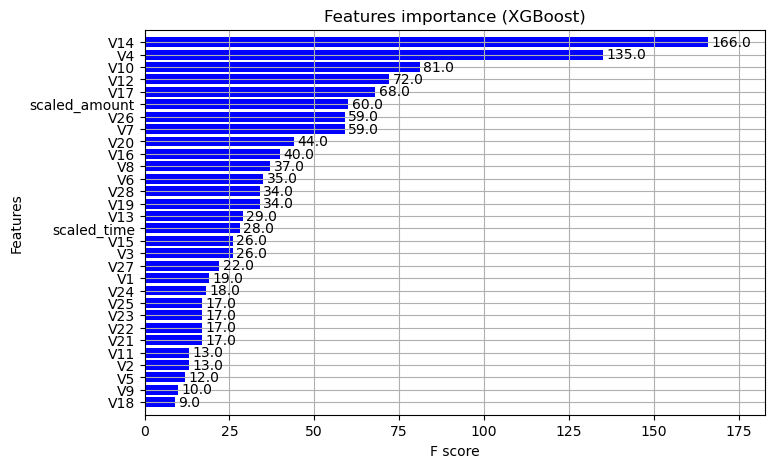

In [136]:
# Features Importance
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="blue") 
plt.show()

In [137]:
#Predict test set
XG_preds = model.predict(dtest)

In [138]:
# Area Under Curve
roc_auc_score(test_df[target].values, XG_preds)

0.9830544579719919

In [139]:
# Recall Score
recall_score(test_df[target].values, XG_preds.round())

0.7731958762886598

In [140]:
# Accuracy Score
accuracy_score(test_df[target].values, XG_preds.round())

0.9994908886626171

In [141]:
# Precision Score
precision_score(test_df[target].values, XG_preds.round())

0.9146341463414634

In [142]:
# F1 Score
f1_score(test_df[target].values, XG_preds.round())

0.8379888268156425

In [143]:
# AdaBoost Classifier(original data) - Initialization
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)


In [144]:
# fit the model
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [145]:
# Predicting the target values
AD_preds = clf.predict(valid_df[predictors])

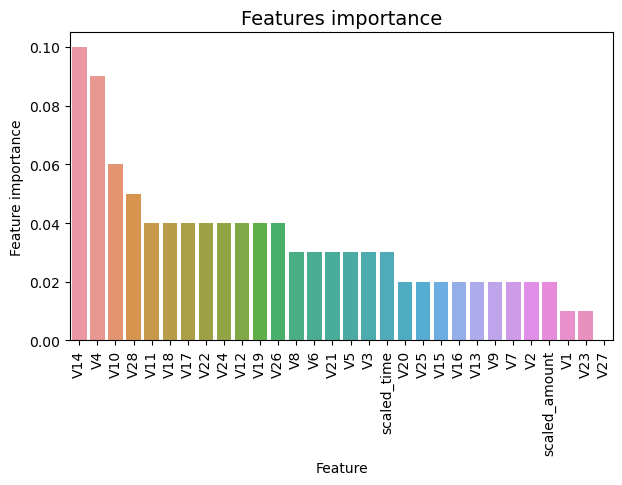

In [146]:
# Features Importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

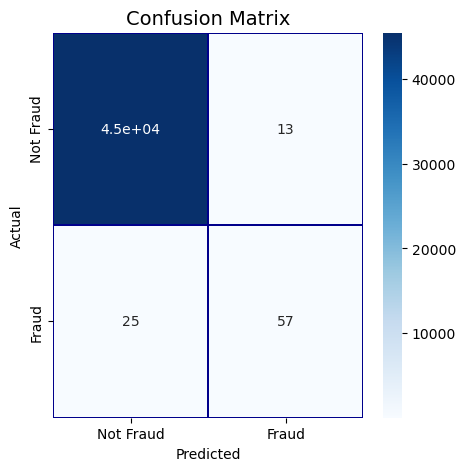

In [147]:
# Confusion Matrix
cm = pd.crosstab(valid_df[target].values, AD_preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [148]:
# Area Under Curve
roc_auc_score(valid_df[target].values, AD_preds)

0.8474180776389072

In [149]:
# Recall Score
recall_score(valid_df[target].values, AD_preds)

0.6951219512195121

In [150]:
# Accuracy Score
accuracy_score(valid_df[target].values, AD_preds)

0.9991660997608023

In [151]:
# Precision Score
precision_score(valid_df[target].values, AD_preds)

0.8142857142857143

In [152]:
# F1 Score
f1_score(valid_df[target].values, AD_preds)

0.75

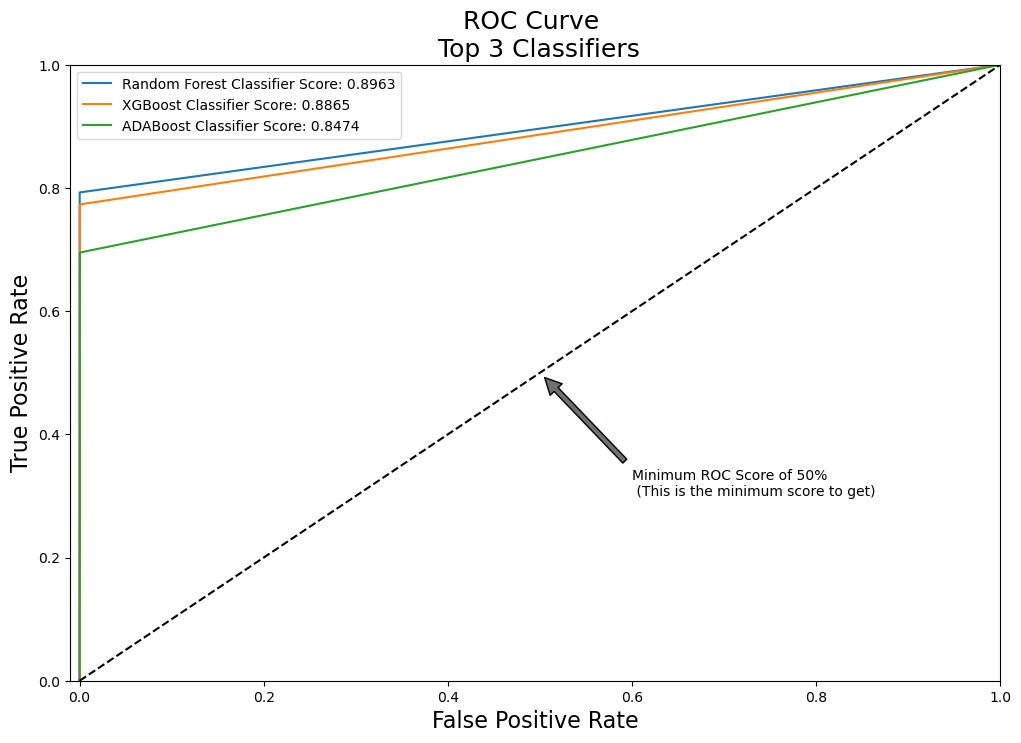

In [154]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.

RF_fpr, RF_tpr, RF_threshold = roc_curve(valid_df[target].values, RF_preds)
XG_fpr, XG_tpr, XG_threshold = roc_curve(test_df[target].values, XG_preds.round())
AD_fpr, AD_tpr, AD_threshold = roc_curve(valid_df[target].values, AD_preds)


def graph_roc_curve_multiple(RF_fpr, RF_tpr, XG_fpr, XG_tpr, AD_fpr, AD_tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(valid_df[target].values, RF_preds)))
    
    plt.plot(XG_fpr, XG_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(test_df[target].values, XG_preds.round())))
    
    plt.plot(AD_fpr, AD_tpr, label='ADABoost Classifier Score: {:.4f}'.format(roc_auc_score(valid_df[target].values, AD_preds)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(RF_fpr, RF_tpr, XG_fpr, XG_tpr, AD_fpr, AD_tpr)
plt.show()

In [155]:
# Splitting data into train, test and validation set (for resampled data)
train_df, test_df = train_test_split(new_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [156]:
# Random Forest Classifier (Resampled Data) - Initialization
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [157]:
# Training the model with train_df and fit function
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [158]:
# Predicting the target values for the valid_df data, using the predict function
RF_preds = clf.predict(valid_df[predictors])

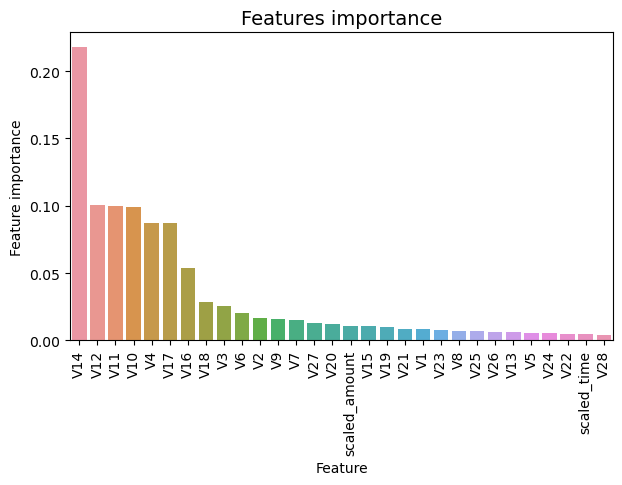

In [159]:
# Features Importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

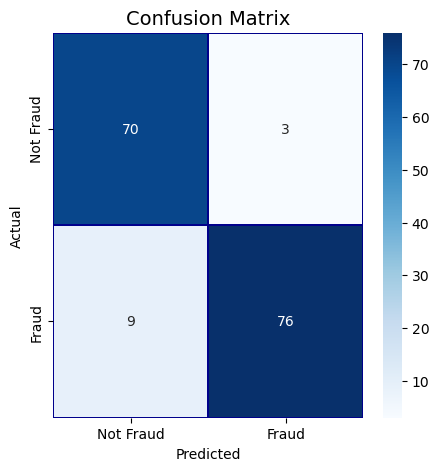

In [160]:
# Confusion Matrix
cm = pd.crosstab(valid_df[target].values, RF_preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [161]:
# Area Under Curve
roc_auc_score(valid_df[target].values, RF_preds)

0.9265108783239324

In [162]:
# Recall Score
recall_score(valid_df[target].values, RF_preds)

0.8941176470588236

In [163]:
# Accuracy Score
accuracy_score(valid_df[target].values, RF_preds)

0.9240506329113924

In [164]:
# Precision Score
precision_score(valid_df[target].values, RF_preds)

0.9620253164556962

In [165]:
# F1 Score
f1_score(valid_df[target].values, RF_preds)

0.926829268292683

In [166]:
# XGBoost Algorithm (Resampled Data) - Initialization

dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [167]:
# Training the model 
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.96339	valid-auc:0.95222
[50]	train-auc:0.99274	valid-auc:0.98550
[100]	train-auc:0.99711	valid-auc:0.98308
[119]	train-auc:0.99814	valid-auc:0.98163


/Users/damilolashobowale/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:727: FutureWarning:

Pass `evals` as keyword args.

/Users/damilolashobowale/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning:

[23:02:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.




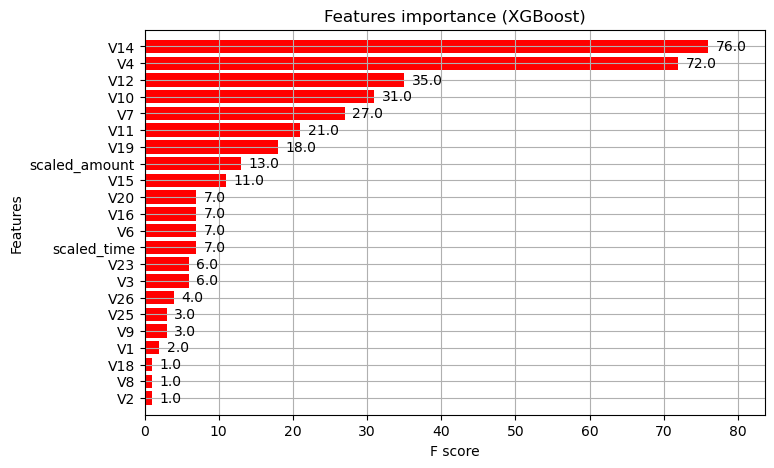

In [168]:
# Features Importance
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="red") 
plt.show()

In [169]:
#Predict test set
XG_preds = model.predict(dtest)

In [170]:
# Area Under Curve
roc_auc_score(test_df[target].values, XG_preds)

0.9881816296910637

In [171]:
# Recall Score
recall_score(test_df[target].values, XG_preds.round())

0.8584905660377359

In [172]:
# Accuracy Score
accuracy_score(test_df[target].values, XG_preds.round())

0.9238578680203046

In [173]:
# Precision Score
precision_score(test_df[target].values, XG_preds.round())

1.0

In [174]:
# F1 Score
f1_score(test_df[target].values, XG_preds.round())

0.9238578680203046

In [175]:
# AdaBoost Classifier(Resampled data) - Initialization
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)


In [176]:
# fit the model
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [177]:
# Predicting the target values
AD_preds = clf.predict(valid_df[predictors])

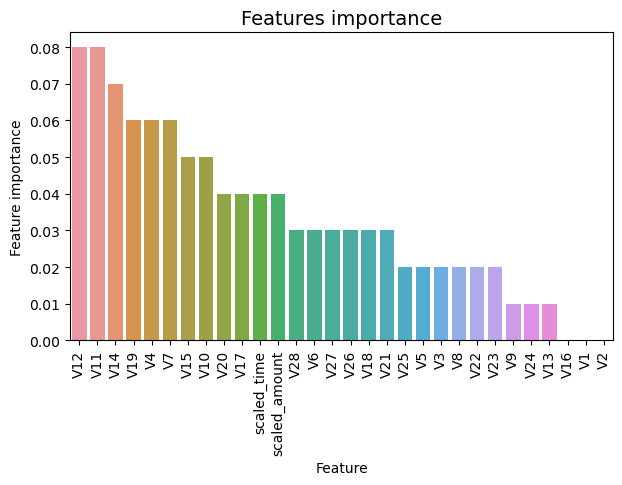

In [178]:
# Features Importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

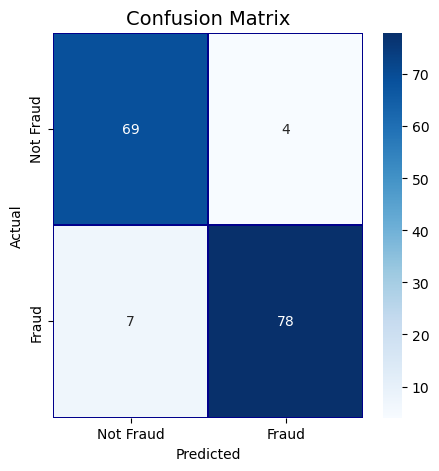

In [179]:
# Confusion Matrix
cm = pd.crosstab(valid_df[target].values, AD_preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [180]:
# Area Under Curve
roc_auc_score(valid_df[target].values, AD_preds)

0.931426269137792

In [181]:
# Recall Score
recall_score(valid_df[target].values, AD_preds)

0.9176470588235294

In [182]:
# Accuracy Score
accuracy_score(valid_df[target].values, AD_preds)

0.930379746835443

In [183]:
# Precision Score
precision_score(valid_df[target].values, AD_preds)

0.9512195121951219

In [184]:
# F1 Score
f1_score(valid_df[target].values, AD_preds)

0.9341317365269461

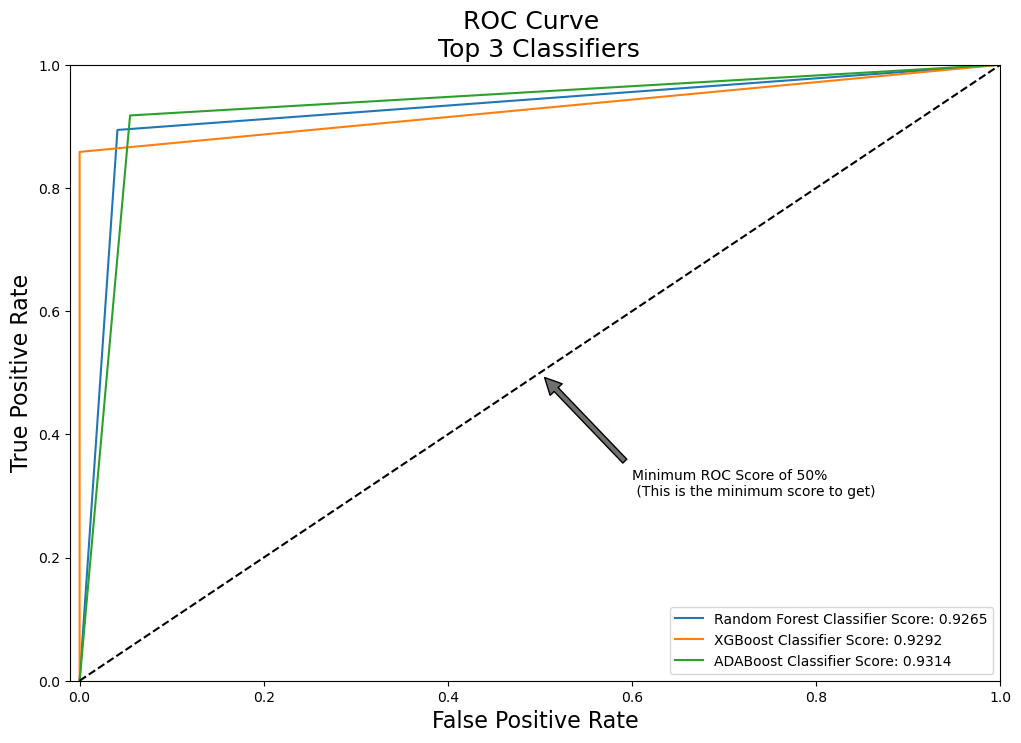

In [185]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.

RF_fpr, RF_tpr, RF_threshold = roc_curve(valid_df[target].values, RF_preds)
XG_fpr, XG_tpr, XG_threshold = roc_curve(test_df[target].values, XG_preds.round())
AD_fpr, AD_tpr, AD_threshold = roc_curve(valid_df[target].values, AD_preds)


def graph_roc_curve_multiple(RF_fpr, RF_tpr, XG_fpr, XG_tpr, AD_fpr, AD_tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(valid_df[target].values, RF_preds)))
    
    plt.plot(XG_fpr, XG_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(test_df[target].values, XG_preds.round())))
    
    plt.plot(AD_fpr, AD_tpr, label='ADABoost Classifier Score: {:.4f}'.format(roc_auc_score(valid_df[target].values, AD_preds)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(RF_fpr, RF_tpr, XG_fpr, XG_tpr, AD_fpr, AD_tpr)
plt.show()